In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd           
import statsmodels.formula.api as smf
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("CarPrice_Assignment.csv.xls")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
df.head(2)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.shape

(205, 26)

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
df.drop("car_ID",axis=1,inplace=True)

In [8]:
df.shape

(205, 25)

### price

In [9]:
df.price.value_counts()

8921.0     2
9279.0     2
7898.0     2
8916.5     2
7775.0     2
          ..
45400.0    1
16503.0    1
5389.0     1
6189.0     1
22625.0    1
Name: price, Length: 189, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Density'>

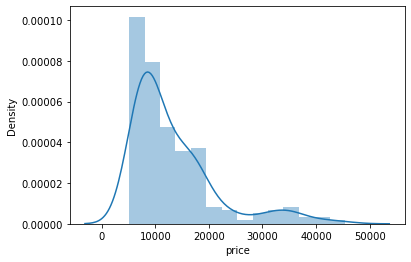

In [10]:
sns.distplot(df.price)

<AxesSubplot:xlabel='price'>

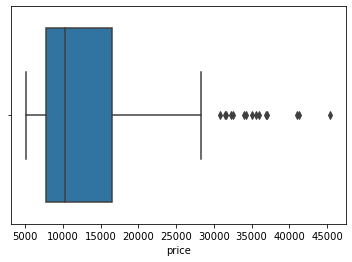

In [11]:
sns.boxplot(df.price)    

# symboling ---cat

In [12]:
df.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

<AxesSubplot:xlabel='symboling', ylabel='count'>

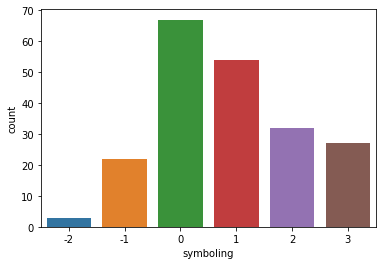

In [13]:
sns.countplot(df.symboling)

In [14]:
#target_con ~ predection_cat-----anova
annova=ols('price ~ symboling',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

              df        sum_sq       mean_sq        F   PR(>F)
symboling    1.0  8.328034e+07  8.328034e+07  1.30685  0.25431
Residual   203.0  1.293636e+10  6.372591e+07      NaN      NaN


In [15]:
df.drop("symboling",axis=1,inplace=True)

# CarName

In [16]:
df.CarName.value_counts()

toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64

<AxesSubplot:xlabel='CarName', ylabel='count'>

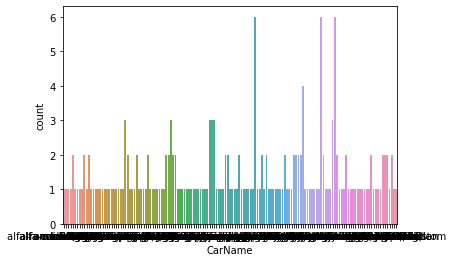

In [17]:
sns.countplot(df.CarName)

In [18]:
annova=ols('price ~ CarName',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

             df        sum_sq       mean_sq        F  PR(>F)
CarName   146.0  1.243317e+10  8.515869e+07  8.42191     0.0
Residual   58.0  5.864709e+08  1.011157e+07      NaN     NaN


### fueltype

In [19]:
df.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df['fueltype'] = lr.fit_transform(df['fueltype'])

<AxesSubplot:xlabel='fueltype', ylabel='count'>

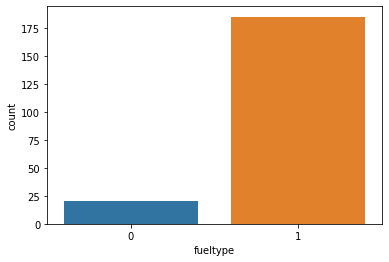

In [21]:
sns.countplot(df.fueltype)

In [22]:
#target_con ~ predection_cat-----anova
annova=ols('price ~ fueltype',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

             df        sum_sq       mean_sq        F   PR(>F)
fueltype    1.0  1.454053e+08  1.454053e+08  2.29274  0.13154
Residual  203.0  1.287423e+10  6.341987e+07      NaN      NaN


In [23]:
df.drop("fueltype",axis=1,inplace=True)

### aspiration

In [24]:
df.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [25]:
from sklearn.preprocessing import LabelEncoder
lr1 = LabelEncoder()
df['aspiration'] = lr1.fit_transform(df['aspiration'])

<AxesSubplot:xlabel='aspiration', ylabel='count'>

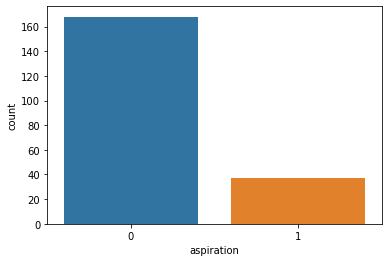

In [26]:
sns.countplot(df.aspiration)

In [27]:
#target_con ~ predection_cat-----anova
annova=ols('price ~ aspiration',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

               df        sum_sq       mean_sq        F  PR(>F)
aspiration    1.0  4.121724e+08  4.121724e+08  6.63662  0.0107
Residual    203.0  1.260747e+10  6.210575e+07      NaN     NaN


### doornumber

In [28]:
df.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [29]:
lr2 = LabelEncoder()
df['doornumber'] = lr2.fit_transform(df['doornumber'])

<AxesSubplot:xlabel='doornumber', ylabel='count'>

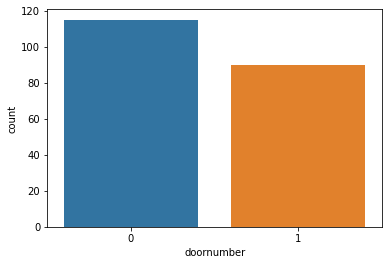

In [30]:
sns.countplot(df.doornumber)

In [31]:
annova=ols('price ~ doornumber',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

               df        sum_sq       mean_sq        F   PR(>F)
doornumber    1.0  1.319520e+07  1.319520e+07  0.20595  0.65045
Residual    203.0  1.300644e+10  6.407115e+07      NaN      NaN


In [32]:
df.drop("doornumber",axis=1,inplace=True)

### carbody

In [33]:
df.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [34]:
from sklearn.preprocessing import LabelEncoder
lr3 = LabelEncoder()
df['carbody'] = lr3.fit_transform(df['carbody'])

<AxesSubplot:xlabel='carbody', ylabel='count'>

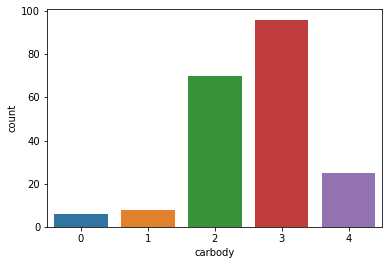

In [35]:
sns.countplot(df.carbody)

In [36]:
#target_con ~ predection_cat-----anova
annova=ols('price ~ carbody',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

             df        sum_sq       mean_sq        F   PR(>F)
carbody     1.0  9.181339e+07  9.181339e+07  1.44171  0.23126
Residual  203.0  1.292783e+10  6.368387e+07      NaN      NaN


In [37]:
df.drop(['carbody'],axis=1,inplace=True)

In [38]:
df.columns

Index(['CarName', 'aspiration', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### drivewheel

In [39]:
df.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [40]:
lr4 = LabelEncoder()
df['drivewheel'] = lr4.fit_transform(df['drivewheel'])

In [41]:
df.drivewheel=df.drivewheel.replace({0:2})

<AxesSubplot:xlabel='drivewheel', ylabel='count'>

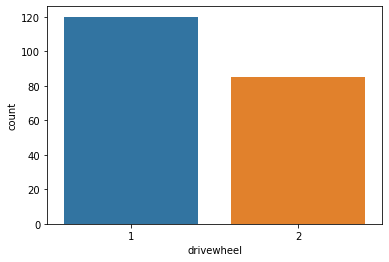

In [42]:
sns.countplot(df.drivewheel)

In [43]:
annova=ols('price ~ drivewheel',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

               df        sum_sq       mean_sq          F  PR(>F)
drivewheel    1.0  4.717590e+09  4.717590e+09  115.35355     0.0
Residual    203.0  8.302049e+09  4.089679e+07        NaN     NaN


#### enginelocation

In [44]:
df.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [45]:
lr5 = LabelEncoder()
df['enginelocation'] = lr5.fit_transform(df['enginelocation'])

<AxesSubplot:xlabel='enginelocation', ylabel='count'>

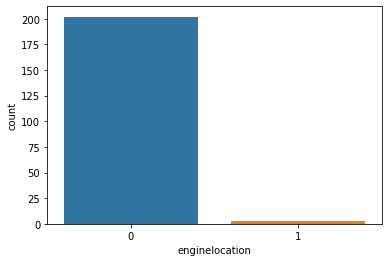

In [46]:
sns.countplot(df.enginelocation)

In [47]:
annova=ols('price ~ enginelocation',data=df).fit()
an=sm.stats.anova_lm(annova)
print(an.round(decimals=5))

                   df        sum_sq       mean_sq         F  PR(>F)
enginelocation    1.0  1.374973e+09  1.374973e+09  23.96974     0.0
Residual        203.0  1.164467e+10  5.736289e+07       NaN     NaN


### wheelbase

In [48]:
df.wheelbase.value_counts()

94.5     21
93.7     20
95.7     13
96.5      8
97.3      7
98.4      7
104.3     6
100.4     6
107.9     6
98.8      6
99.1      6
96.3      6
109.1     5
93.1      5
97.2      5
95.9      5
102.4     5
97.0      4
95.3      4
114.2     4
101.2     4
110.0     3
103.5     3
89.5      3
105.8     3
96.1      2
102.9     2
104.5     2
91.3      2
96.9      2
88.6      2
113.0     2
99.8      2
115.6     2
103.3     2
86.6      2
104.9     2
93.3      1
99.4      1
99.5      1
88.4      1
94.3      1
96.0      1
95.1      1
93.0      1
102.0     1
106.7     1
108.0     1
96.6      1
99.2      1
112.0     1
102.7     1
120.9     1
Name: wheelbase, dtype: int64

<AxesSubplot:xlabel='wheelbase', ylabel='Density'>

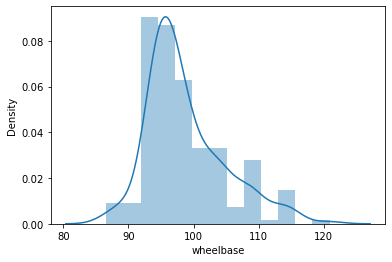

In [49]:
sns.distplot(df.wheelbase)

<AxesSubplot:xlabel='wheelbase'>

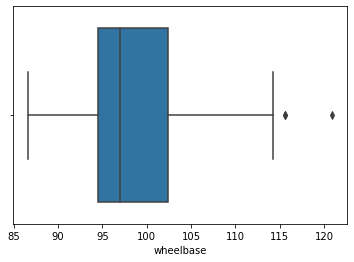

In [50]:
sns.boxplot(df.wheelbase) 

### carlength

In [51]:
df.carlength.value_counts()

157.3    15
188.8    11
171.7     7
186.7     7
166.3     7
         ..
165.6     1
187.5     1
180.3     1
208.1     1
199.2     1
Name: carlength, Length: 75, dtype: int64

<AxesSubplot:xlabel='carlength', ylabel='Density'>

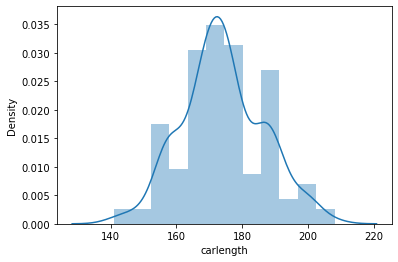

In [52]:
sns.distplot(df.carlength)

<AxesSubplot:xlabel='carlength'>

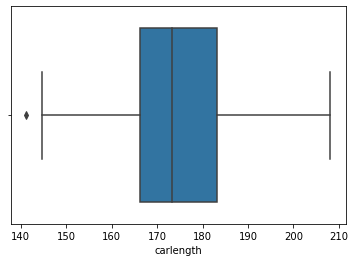

In [53]:
sns.boxplot(df.carlength)  

### carwidth

In [54]:
df.carwidth.value_counts()

63.8    24
66.5    23
65.4    15
63.6    11
64.4    10
68.4    10
64.0     9
65.5     8
65.2     7
64.2     6
66.3     6
65.6     6
67.2     6
67.9     5
66.9     5
65.7     4
68.9     4
64.8     4
63.9     3
70.3     3
71.7     3
71.4     3
65.0     3
68.3     2
67.7     2
64.1     2
66.1     2
69.6     2
64.6     2
72.0     1
68.0     1
70.5     1
61.8     1
66.0     1
62.5     1
70.6     1
72.3     1
66.6     1
63.4     1
60.3     1
70.9     1
66.4     1
66.2     1
68.8     1
Name: carwidth, dtype: int64

<AxesSubplot:xlabel='carwidth', ylabel='Density'>

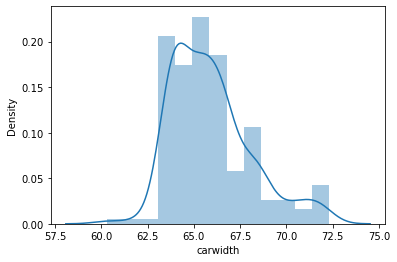

In [55]:
sns.distplot(df.carwidth)

<AxesSubplot:xlabel='carwidth'>

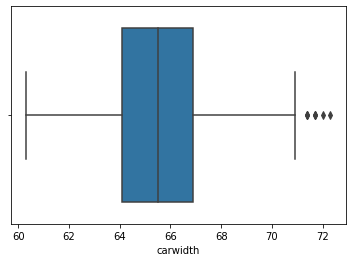

In [56]:
sns.boxplot(df.carwidth)

In [57]:
iqr=stats.iqr(df.carwidth)
q3=df.carwidth.quantile(0.75)
upper_bond_carwidth=q3+(1.5*iqr)

In [58]:
df.carwidth=np.where(df.carwidth>upper_bond_carwidth,upper_bond_carwidth,df.price)

### carheight

In [59]:
df.carheight.value_counts()

50.8    14
52.0    12
55.7    12
54.1    10
54.5    10
55.5     9
56.7     8
54.3     8
52.6     7
56.1     7
51.6     7
53.0     6
52.8     6
54.9     6
50.2     6
53.7     5
55.1     5
50.6     5
49.6     4
58.7     4
53.3     4
52.5     3
59.1     3
56.2     3
49.7     3
57.5     3
53.5     3
54.4     2
53.9     2
56.3     2
50.5     2
59.8     2
56.5     2
54.7     2
48.8     2
49.4     2
51.4     2
51.0     1
54.8     1
55.4     1
56.0     1
55.2     1
53.2     1
47.8     1
55.9     1
52.4     1
55.6     1
53.1     1
58.3     1
Name: carheight, dtype: int64

<AxesSubplot:xlabel='carheight', ylabel='Density'>

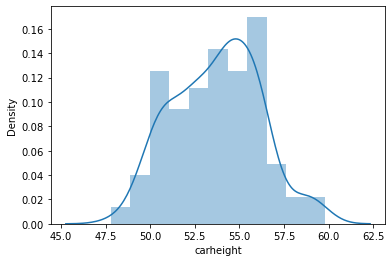

In [60]:
sns.distplot(df.carheight)

<AxesSubplot:xlabel='carheight'>

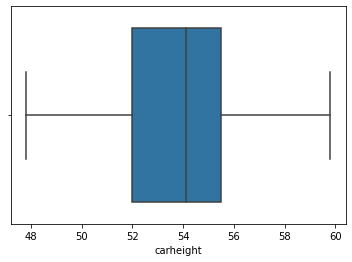

In [61]:
sns.boxplot(df.carheight) 

### curbweight

In [62]:
df.curbweight.value_counts()

2385    4
1918    3
2275    3
1989    3
2410    2
       ..
2370    1
2328    1
2833    1
2921    1
3062    1
Name: curbweight, Length: 171, dtype: int64

<AxesSubplot:xlabel='curbweight', ylabel='Density'>

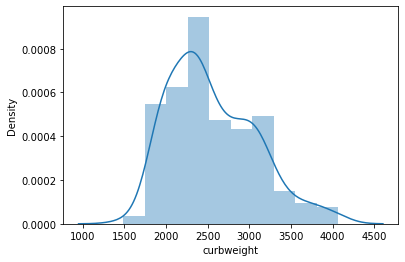

In [63]:
sns.distplot(df.curbweight) 

<AxesSubplot:xlabel='curbweight'>

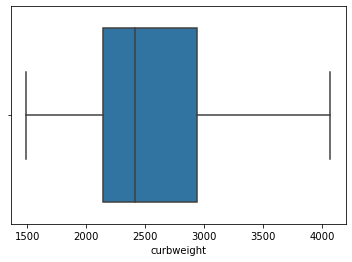

In [64]:
sns.boxplot(df.curbweight)

### enginetype

In [65]:
df.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [66]:
lr6 = LabelEncoder()
df['enginetype'] = lr6.fit_transform(df['enginetype'])

<AxesSubplot:xlabel='enginetype', ylabel='count'>

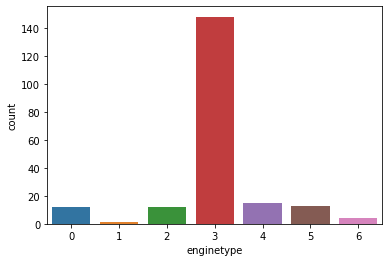

In [67]:
sns.countplot(df.enginetype)

In [68]:
annova=ols('price ~ enginetype',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq     df      F   PR(>F)
enginetype  3.147871e+07    1.0  0.492  0.48384
Residual    1.298816e+10  203.0    NaN      NaN


In [69]:
df.drop(['enginetype'],axis=1,inplace=True)

### cylindernumber

In [70]:
df.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [71]:
lr7 = LabelEncoder()
df['cylindernumber'] = lr7.fit_transform(df['cylindernumber'])

<AxesSubplot:xlabel='cylindernumber', ylabel='count'>

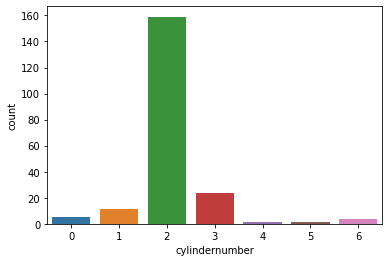

In [72]:
sns.countplot(df.cylindernumber)

In [73]:
annova=ols('price ~ cylindernumber',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                      sum_sq     df        F   PR(>F)
cylindernumber  9.937874e+06    1.0  0.15507  0.69415
Residual        1.300970e+10  203.0      NaN      NaN


In [74]:
df.drop(['cylindernumber'],axis=1,inplace=True)

### enginesize

In [75]:
df.enginesize.value_counts()

122    15
92     15
97     14
98     14
108    13
90     12
110    12
109     8
120     7
141     7
152     6
181     6
146     6
121     6
156     5
136     5
91      5
183     4
130     4
171     3
70      3
194     3
209     3
164     3
258     2
140     2
134     2
234     2
132     2
131     2
173     1
203     1
161     1
80      1
151     1
103     1
304     1
308     1
326     1
119     1
111     1
79      1
61      1
145     1
Name: enginesize, dtype: int64

<AxesSubplot:xlabel='enginesize', ylabel='Density'>

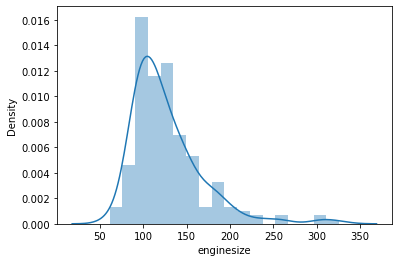

In [76]:
sns.distplot(df.enginesize)

<AxesSubplot:xlabel='enginesize'>

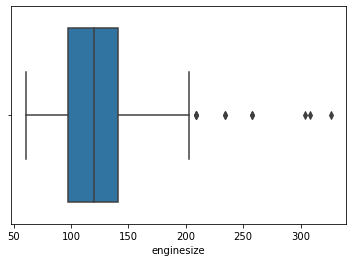

In [77]:
sns.boxplot(df.enginesize)

In [78]:
iqr=stats.iqr(df.enginesize)
q3=df.enginesize.quantile(0.75)
upper_bond_enginesize=q3+(1.5*iqr)

In [79]:
df.enginesize=np.where(df.enginesize>upper_bond_enginesize,upper_bond_enginesize,df.price)

<AxesSubplot:xlabel='enginesize'>

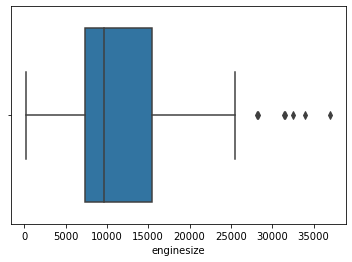

In [80]:
sns.boxplot(df.enginesize)

In [81]:
df.columns

Index(['CarName', 'aspiration', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

### fuelsystem

In [82]:
df.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

<AxesSubplot:xlabel='fuelsystem', ylabel='count'>

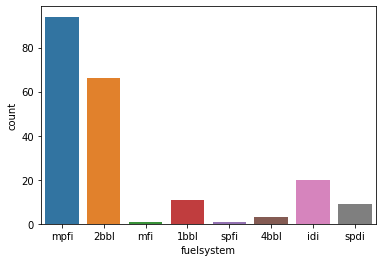

In [83]:
sns.countplot(df.fuelsystem)

In [84]:
#target_con ~ predection_cat-----anova
annova=ols('price ~ fuelsystem',data=df).fit()
an=sm.stats.anova_lm(annova,typ=2)
print(an.round(decimals=5))

                  sum_sq     df         F  PR(>F)
fuelsystem  4.651199e+09    7.0  15.64186     0.0
Residual    8.368441e+09  197.0       NaN     NaN


In [85]:
tukey = pairwise_tukeyhsd(df.price,df.fuelsystem,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
  1bbl   2bbl   -77.3939    1.0  -6580.5935  6425.8056  False
  1bbl   4bbl  4589.4545 0.9601  -8416.9445 17595.8536  False
  1bbl    idi  8282.6045 0.0191    786.7779 15778.4312   True
  1bbl    mfi  5408.4545 0.9933 -15448.1836 26265.0927  False
  1bbl   mpfi 10199.0574 0.0001    3835.728 16562.3868   True
  1bbl   spdi   3434.899 0.9388   -5540.369  12410.167  False
  1bbl   spfi  3492.4545 0.9996 -17364.1836 24349.0927  False
  2bbl   4bbl  4666.8485 0.9273  -7121.2017 16454.8987  False
  2bbl    idi  8359.9985    0.0    3263.026 13456.9709   True
  2bbl    mfi  5485.8485 0.9909 -14633.5717 25605.2686  False
  2bbl   mpfi 10276.4513   -0.0   7069.6347 13483.2679   True
  2bbl   spdi  3512.2929 0.7978  -3583.2795 10607.8653  False
  2bbl   spfi  3569.8485 0.9994 -16549.5717 23689.2686  False
  4bbl  

In [86]:
df['fuelsystem'].replace({'4bbl':'1bbl'},inplace=True)
df['fuelsystem'].replace({'4bbl':'1bbl'},inplace=True)
df['fuelsystem'].replace({'spfi':'idi'},inplace=True)

In [87]:
tukey = pairwise_tukeyhsd(df.price,df.fuelsystem,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
  1bbl   2bbl -1060.8485 0.9938   -6575.232   4453.535  False
  1bbl    idi  7071.0476 0.0231    604.8598 13537.2354   True
  1bbl    mfi     4425.0 0.9863 -14973.5635 23823.5635  False
  1bbl   mpfi  9215.6028    0.0   3846.8688 14584.3369   True
  1bbl   spdi  2451.4444 0.9507  -5555.4961  10458.385  False
  2bbl    idi  8131.8961    0.0   3436.5677 12827.2245   True
  2bbl    mfi  5485.8485 0.9604 -13396.3863 24368.0832  False
  2bbl   mpfi 10276.4513   -0.0   7266.8286  13286.074   True
  2bbl   spdi  3512.2929 0.6532  -3146.9578 10171.5437  False
   idi    mfi -2646.0476 0.9987 -21827.8606 16535.7653  False
   idi   mpfi  2144.5552 0.7482  -2378.8272  6667.9376  False
   idi   spdi -4619.6032 0.4807 -12086.1137  2846.9074  False
   mfi   mpfi  4790.6028 0.9778 -14049.6113  23630.817  False
   mfi  

In [88]:
df['fuelsystem'].replace({'2bbl':'1bbl'},inplace=True)
df['fuelsystem'].replace({'mfi':'1bbl'},inplace=True)
df['fuelsystem'].replace({'spfi':'2bbl'},inplace=True)

In [89]:
tukey = pairwise_tukeyhsd(df.price,df.fuelsystem,alpha=0.05)
print (tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
  1bbl    idi  7880.8131    0.0   3760.0794 12001.5467   True
  1bbl   mpfi 10025.3683    0.0   7474.1994 12576.5371   True
  1bbl   spdi  3261.2099 0.4828  -2651.4665  9173.8863  False
   idi   mpfi  2144.5552  0.521  -1917.0898  6206.2002  False
   idi   spdi -4619.6032 0.2835  -11323.948  2084.7417  False
  mpfi   spdi -6764.1584 0.0167 -12635.8069  -892.5099   True
-------------------------------------------------------------


In [90]:
df['fuelsystem'].replace({'spdi':'idi'},inplace=True)
df['fuelsystem'].replace({'mfi':'idi'},inplace=True)
df['fuelsystem'].replace({'spfi':'1bbl'},inplace=True)

In [91]:
tukey = pairwise_tukeyhsd(df.price,df.fuelsystem,alpha=0.05)
print (tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower     upper    reject
-----------------------------------------------------------
  1bbl    idi  6494.9321    0.0 3199.3529  9790.5113   True
  1bbl   mpfi 10025.3683   -0.0 7687.6833 12363.0532   True
   idi   mpfi  3530.4362 0.0286  297.0343   6763.838   True
-----------------------------------------------------------


In [92]:
lr8 = LabelEncoder()
df['fuelsystem'] = lr8.fit_transform(df['fuelsystem'])

### boreratio

In [93]:
df.boreratio.value_counts()

3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.31     8
3.43     8
3.78     8
3.27     7
2.91     7
3.58     6
3.39     6
3.33     6
3.05     6
3.54     6
3.70     5
3.01     5
3.35     4
3.17     3
3.59     3
3.74     3
3.47     2
3.94     2
3.24     2
3.63     2
3.13     2
3.80     2
3.50     2
2.54     1
3.08     1
3.61     1
3.34     1
2.68     1
3.60     1
2.92     1
3.76     1
2.99     1
Name: boreratio, dtype: int64

<AxesSubplot:xlabel='boreratio'>

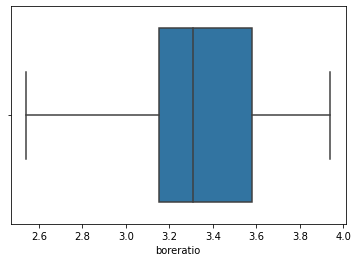

In [94]:
sns.boxplot(df.boreratio)

<AxesSubplot:xlabel='boreratio', ylabel='Density'>

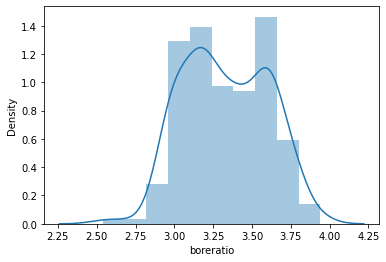

In [95]:
sns.distplot(df.boreratio)

### stroke

In [96]:
df.stroke.value_counts()

3.400    20
3.230    14
3.150    14
3.030    14
3.390    13
2.640    11
3.290     9
3.350     9
3.460     8
3.110     6
3.270     6
3.410     6
3.070     6
3.580     6
3.190     6
3.500     6
3.640     5
3.520     5
3.860     4
3.540     4
3.470     4
3.255     4
3.900     3
2.900     3
3.100     2
4.170     2
2.800     2
2.190     2
3.080     2
2.680     2
2.360     1
3.160     1
2.070     1
3.210     1
3.120     1
2.760     1
2.870     1
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke'>

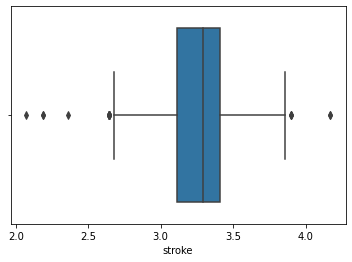

In [97]:
sns.boxplot(df.stroke)

In [98]:
iqr=stats.iqr(df.stroke)
q3=df.stroke.quantile(0.75)
upper_bond_stroke=q3+(1.5*iqr)

In [99]:
df.stroke=np.where(df.stroke>upper_bond_stroke,upper_bond_stroke,df.price)

<AxesSubplot:xlabel='stroke'>

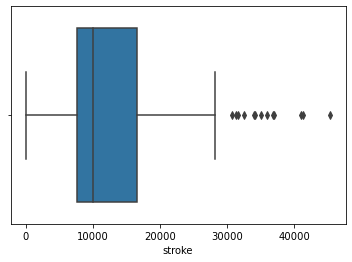

In [100]:
sns.boxplot(df.stroke)

<AxesSubplot:xlabel='stroke', ylabel='Density'>

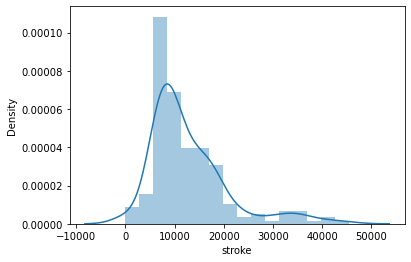

In [101]:
sns.distplot(df.stroke)

### compressionratio

In [102]:
df.compressionratio.value_counts()

9.00     46
9.40     26
8.50     14
9.50     13
9.30     11
8.70      9
8.00      8
9.20      8
7.00      7
8.60      5
21.00     5
8.40      5
7.50      5
23.00     5
9.60      5
21.50     4
7.60      4
10.00     3
22.50     3
8.30      3
8.80      3
7.70      2
8.10      2
9.10      1
9.31      1
7.80      1
9.41      1
21.90     1
22.00     1
22.70     1
10.10     1
11.50     1
Name: compressionratio, dtype: int64

<AxesSubplot:xlabel='compressionratio'>

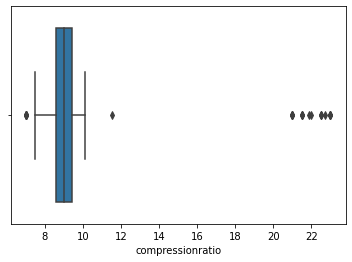

In [103]:
sns.boxplot(df.compressionratio)

In [104]:
iqr=stats.iqr(df.compressionratio)
q3=df.compressionratio.quantile(0.75)
upper_bond_compressionratio=q3+(1.5*iqr)

In [105]:
df.compressionratio=np.where(df.compressionratio>upper_bond_compressionratio,upper_bond_compressionratio,df.price)

<AxesSubplot:xlabel='compressionratio'>

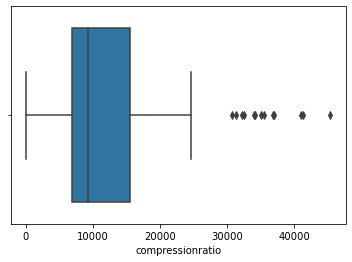

In [106]:
sns.boxplot(df.compressionratio)

<AxesSubplot:xlabel='compressionratio', ylabel='Density'>

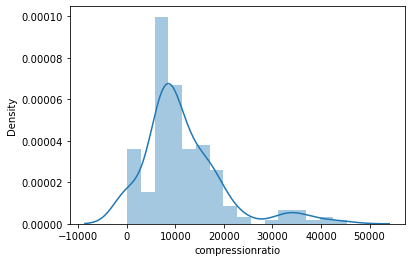

In [107]:
sns.distplot(df.compressionratio)

#### horsepower

In [108]:
df.horsepower.value_counts()

68     19
70     11
69     10
116     9
110     8
95      7
114     6
160     6
101     6
62      6
88      6
145     5
76      5
97      5
84      5
90      5
82      5
102     5
92      4
111     4
123     4
86      4
207     3
73      3
182     3
121     3
85      3
152     3
176     2
94      2
56      2
112     2
161     2
184     2
155     2
156     2
52      2
100     2
162     2
140     1
115     1
134     1
78      1
142     1
288     1
143     1
48      1
200     1
58      1
55      1
60      1
175     1
154     1
72      1
120     1
64      1
135     1
262     1
106     1
Name: horsepower, dtype: int64

<AxesSubplot:xlabel='horsepower'>

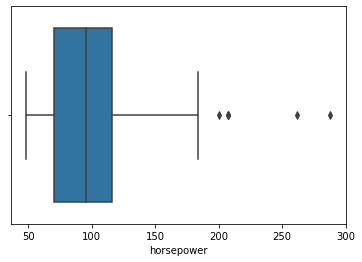

In [109]:
sns.boxplot(df.horsepower)

In [110]:
iqr=stats.iqr(df.horsepower)
q3=df.horsepower.quantile(0.75)
upper_bond_horsepower=q3+(1.5*iqr)

In [111]:
df.horsepower=np.where(df.horsepower>upper_bond_horsepower,upper_bond_horsepower,df.horsepower)

<AxesSubplot:xlabel='horsepower'>

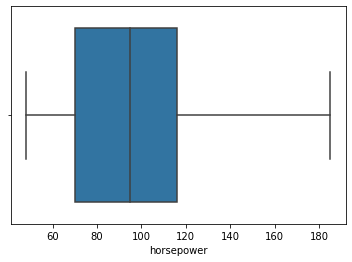

In [112]:
sns.boxplot(df.horsepower)

<AxesSubplot:xlabel='horsepower', ylabel='Density'>

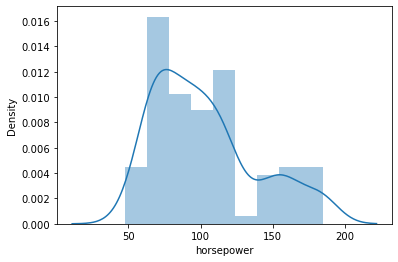

In [113]:
sns.distplot(df.horsepower)

### peakrpm

In [114]:
df.peakrpm.value_counts

<bound method IndexOpsMixin.value_counts of 0      5000
1      5000
2      5000
3      5500
4      5500
       ... 
200    5400
201    5300
202    5500
203    4800
204    5400
Name: peakrpm, Length: 205, dtype: int64>

<AxesSubplot:xlabel='peakrpm'>

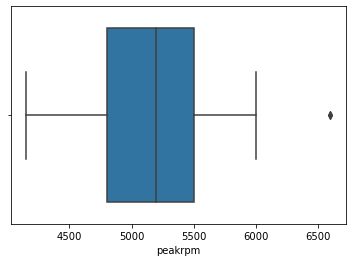

In [115]:
sns.boxplot(df.peakrpm)

<AxesSubplot:xlabel='peakrpm', ylabel='Density'>

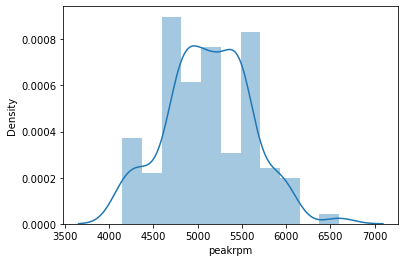

In [116]:
sns.distplot(df.peakrpm)

### citympg

In [117]:
df.citympg.value_counts()

31    28
19    27
24    22
27    14
17    13
26    12
23    12
21     8
25     8
30     8
38     7
28     7
16     6
37     6
22     4
29     3
15     3
20     3
18     3
14     2
34     1
35     1
32     1
36     1
45     1
13     1
49     1
47     1
33     1
Name: citympg, dtype: int64

<AxesSubplot:xlabel='citympg'>

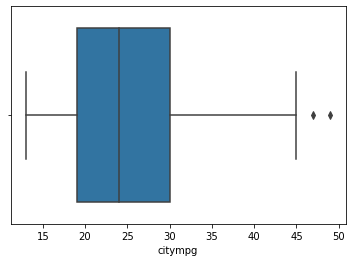

In [118]:
sns.boxplot(df.citympg)

<AxesSubplot:xlabel='citympg', ylabel='Density'>

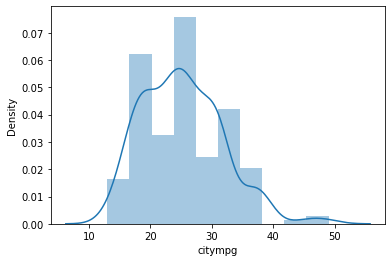

In [119]:
sns.distplot(df.citympg)

### highwaympg

In [120]:
df.highwaympg.value_counts()

25    19
38    17
24    17
30    16
32    16
34    14
37    13
28    13
29    10
33     9
22     8
31     8
23     7
27     5
43     4
42     3
26     3
41     3
19     2
39     2
18     2
16     2
20     2
36     2
47     2
46     2
54     1
17     1
53     1
50     1
Name: highwaympg, dtype: int64

<AxesSubplot:xlabel='highwaympg'>

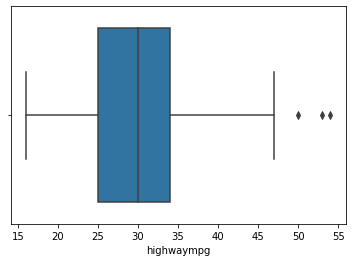

In [121]:
 sns.boxplot(df.highwaympg)

<AxesSubplot:xlabel='highwaympg', ylabel='Density'>

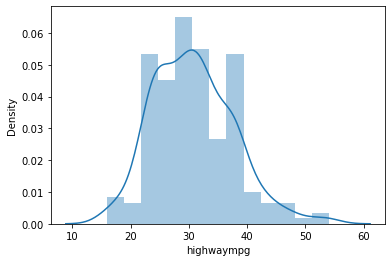

In [122]:
sns.distplot(df.highwaympg)

In [123]:
df.shape

(205, 19)

<AxesSubplot:>

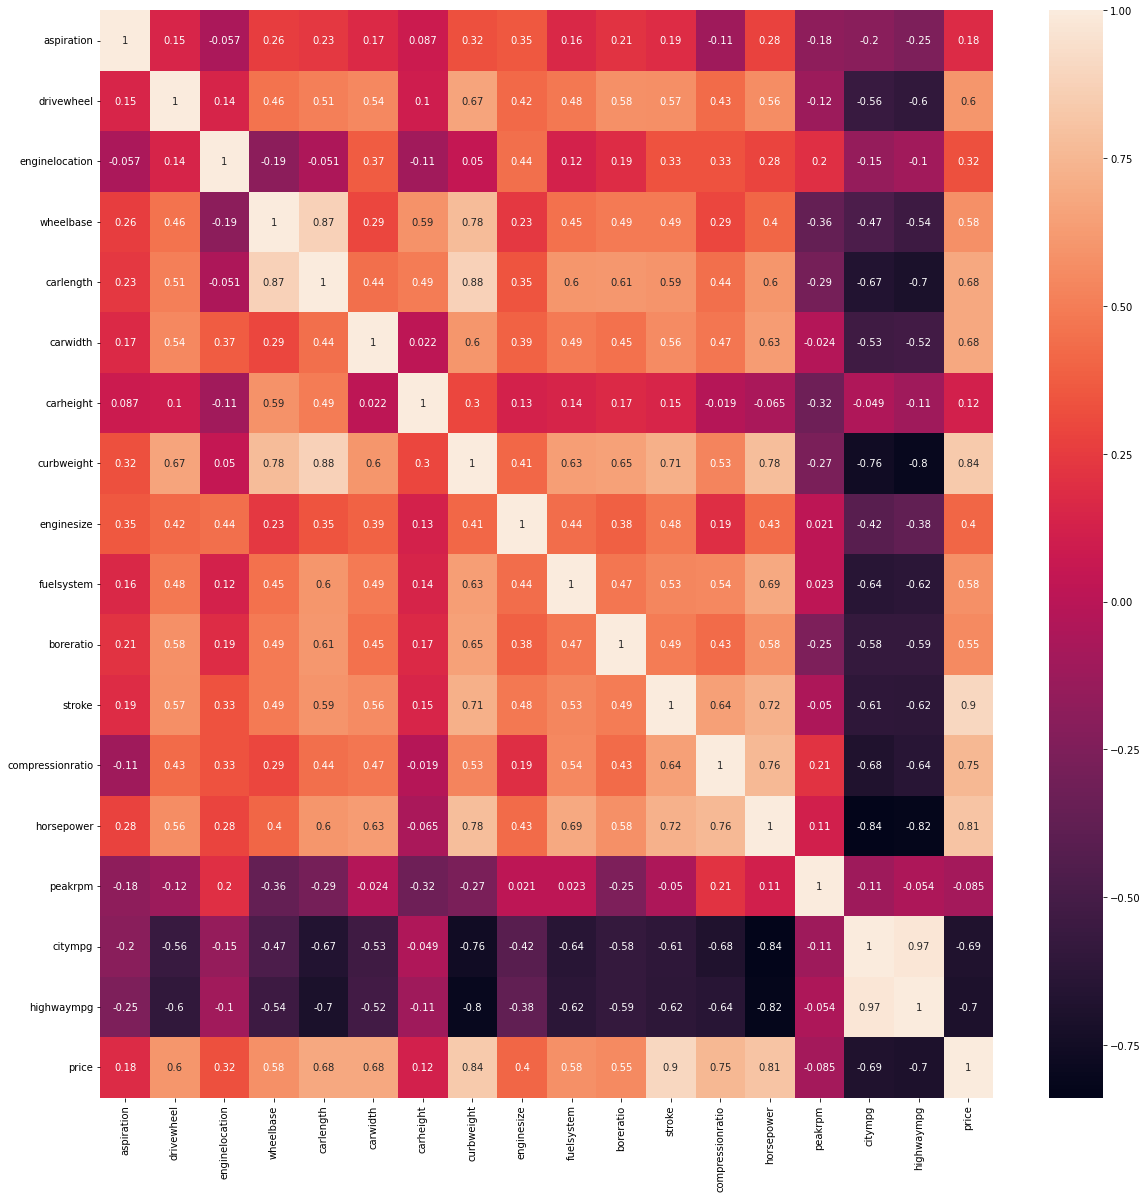

In [124]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [125]:
col=df.columns

In [126]:
for i in col:
    print(i,'+',end=" ")

CarName + aspiration + drivewheel + enginelocation + wheelbase + carlength + carwidth + carheight + curbweight + enginesize + fuelsystem + boreratio + stroke + compressionratio + horsepower + peakrpm + citympg + highwaympg + price + 

In [127]:
df.price=df.price.transform(np.sqrt)

In [128]:
#Running Linear regression 
model_1=smf.ols(formula='price~ aspiration + drivewheel + enginelocation + wheelbase + carlength + carwidth + carheight + curbweight + enginesize + fuelsystem + boreratio + stroke + compressionratio + horsepower + peakrpm + citympg + highwaympg',data=df).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     300.8
Date:                Wed, 15 Mar 2023   Prob (F-statistic):          7.14e-126
Time:                        22:26:59   Log-Likelihood:                -648.55
No. Observations:                 205   AIC:                             1333.
Df Residuals:                     187   BIC:                             1393.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           29.2858     19.136  

In [129]:
df.drop(['CarName','citympg','peakrpm','horsepower','compressionratio','boreratio','carwidth','carheight','curbweight'],axis=1,inplace=True)

In [130]:
df.enginelocation.value_counts()

0    202
1      3
Name: enginelocation, dtype: int64

In [131]:
df['enginelocation'].replace({1:0},inplace=True)

In [132]:
df.enginelocation.value_counts()

0    205
Name: enginelocation, dtype: int64

In [133]:
df.drivewheel.value_counts()

1    120
2     85
Name: drivewheel, dtype: int64

In [134]:
df['drivewheel'].replace({2:1},inplace=True)

In [135]:
df.drivewheel.value_counts()

1    205
Name: drivewheel, dtype: int64

In [136]:
df.aspiration.value_counts()

0    168
1     37
Name: aspiration, dtype: int64

In [137]:
df['aspiration'].replace({1:0},inplace=True)

In [138]:
df.aspiration.value_counts()

0    205
Name: aspiration, dtype: int64

In [139]:
df.fuelsystem.value_counts()

2    94
0    81
1    30
Name: fuelsystem, dtype: int64

In [140]:
df['fuelsystem'].replace({1:0},inplace=True)

In [141]:
df.fuelsystem.value_counts()

0    111
2     94
Name: fuelsystem, dtype: int64

In [142]:
df.shape

(205, 10)

In [143]:
X=df.drop(['price'],axis=1)
Y=df.price

# standard scaling

In [144]:
from sklearn.preprocessing import StandardScaler

In [145]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# train test split

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2,random_state=20)

# linear regression

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [149]:
lr=LinearRegression()

In [150]:
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
r2_lr=round(r2_score(y_test,y_pred)*100,2)
print('R2_score: ',r2_lr)
mse_lr=round(mean_squared_error(y_test,y_pred),2)
print('MSE_score:',mse_lr)
rmse_lr= np.sqrt(mse_lr)
print('RMSE:',rmse_lr)

R2_score:  92.51
MSE_score: 40.53
RMSE: 6.366317616958802


# Decision tree

In [153]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [154]:
#define the parameter space for the hyperparemeters
param_grid={'splitter':['best','random'],
           'criterion':['mse', 'friedman_mse'],
           'max_depth':sp_randint(2,10),
           'min_samples_split':sp_randint(1,10)}

In [155]:
#create the Randomizedsearchcv object
decireg=DecisionTreeRegressor()
random_search=RandomizedSearchCV(decireg,param_grid,cv=5,n_jobs=-1)

In [156]:
random_search.fit(X_train,y_train)
y_pred1=random_search.predict(X_test)
r2_dt=round(r2_score(y_test,y_pred1)*100,2)
print('R2 score:',r2_dt)
mse_dt=round(mean_squared_error(y_test,y_pred1),2)
print('mse: ',mse_dt)
rmse_dt=round(np.sqrt(mse_dt),2)
print('RMSE:',rmse_dt)

R2 score: 99.12
mse:  4.74
RMSE: 2.18


# random forest

In [157]:
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint as sp_randint

In [158]:
rf = RandomForestRegressor(random_state=20)

In [159]:
# Use RandomizedSearchCV to find the best number of estimators
param_distributions = {'n_estimators': sp_randint(10, 100)}
random_search = RandomizedSearchCV(rf, param_distributions, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=20),
                   param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000024842FCFF10>})

In [160]:
# Get the best number of estimators
best_n_estimators = random_search.best_params_['n_estimators']

In [161]:
# Train the random forest model with the best number of estimators
rf = RandomForestRegressor(n_estimators=best_n_estimators, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=98, random_state=42)

In [162]:
y_pred2=rf.predict(X_test)
r2_rf=round(r2_score(y_test,y_pred2)*100,2)
print('R2 score:',r2_rf)
mse_rf=round(mean_squared_error(y_test,y_pred2),2)
print('mse: ',mse_rf)
rmse_rf=round(np.sqrt(mse_rf),2)
print('RMSE:',rmse_rf)

R2 score: 99.86
mse:  0.77
RMSE: 0.88


# svm

In [164]:
from sklearn.svm import SVR

In [165]:
X=df.drop(['price'],axis=1)
Y=df.price

In [166]:
X_train,X_test,y_train,y_test=train_test_split(X,Y, test_size=0.2,random_state=20)

In [167]:
svm = SVR(kernel='linear')

In [168]:
svm.fit(X_train, y_train)

SVR(kernel='linear')

In [169]:
y_pred4 = svm.predict(X_test)
y_pred4

array([136.07519817, 102.2323691 ,  97.16207817, 191.50815797,
        97.18325733, 128.19475448,  78.34099659, 112.48545617,
       167.65040499, 124.82905954,  90.75758745,  96.13031262,
       164.81276417,  82.00335245,  92.5790661 ,  80.73746641,
        94.74011195,  87.122007  , 110.22506645, 175.51358795,
       104.91683224,  93.82547334, 211.17347711, 108.92109001,
       177.87073362, 105.17294327,  84.21436036, 107.05253884,
       150.90098089,  98.64930691, 129.86904854,  96.61451815,
        96.50943282, 105.85090762,  93.58826193, 107.92980322,
        95.36671704, 125.75500536,  96.01597256,  90.81680267,
       103.79487333])

In [170]:
r2_svm=round(r2_score(y_test,y_pred4)*100,2)
print('R2 score:',r2_svm)

R2 score: 34.05


In [171]:
mse_svm = np.mean((y_pred - y_test)**2)
print("Mean Squared Error:", mse_svm)

Mean Squared Error: 40.532323935437574


In [172]:
rmse_svm=round(np.sqrt(mse_svm),2)
print('RMSE:',rmse_rf)

RMSE: 0.88
